# Jamboree Education - Linear Regression

- Jamboree is a renowned education consultancy that has assisted thousands of students in achieving their dreams of studying at top colleges abroad. Specializing in test preparation for GMAT, GRE, and SAT, Jamboree's unique problem-solving methods ensure that students attain maximum scores with minimal effort. 
- Recently, Jamboree launched an innovative feature on their website that allows students to check their probability of gaining admission to Ivy League colleges. This feature, tailored specifically for students from India, offers personalized insights into their chances of securing a spot in prestigious graduate programs, further solidifying Jamboree's commitment to supporting students in their academic journeys.

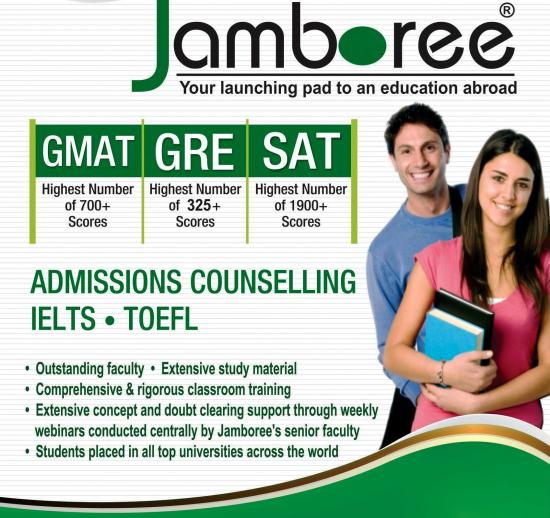

### Objective:

- **Identify Key Admission Factors:** Determine which variables (e.g. CGPA, GRE Scores, LOR, SOP, Research Experience) significantly impact the probability of admission to Ivy League colleges.
- **Understand Interrelationships:** Analyze how these factors interact with each other and their combined effect on admission chances.
- **Improve Predictive Accuracy:** Develop and refine predictive models to accurately estimate a student’s chance of admission based on the identified factors.

## Dataset Information:

#### Source:
Please check the dataset at: "[Dataset Link](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv)"

#### Feature Information:
- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA(CGPA) (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

## Loading the "Jamboree_Admission.csv" Dataset:
For exploring and analysing first we import the Python libraries like numpy,pandas,matplotlib,Seaborn,Scipy and then import the "Jamboree_Admission.csv" dataset and save it in a dataframe "data".

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [7]:
data = pd.read_csv("Jamboree_Admission.csv")

In [8]:
# Getting the first five records of the data

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
# Getting the columns of the data

data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
# Getting the shape of the data

data.shape

(500, 9)

# 1. Basic Exploration of Data

In [11]:
# Dropping the unique row Identifier column 'Serial No.'

data.drop(columns = {'Serial No.'}, inplace = True)

In [12]:
# Renaming columns 'LOR ' and 'Chance of Admit ' to 'LOR' and 'Chance of Admit' resp.

data.rename(columns = {'LOR ': 'LOR','Chance of Admit ':'Chance of Admit'}, inplace = True)

In [13]:
# Getting the info of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [14]:
# Checking for missing values

data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

- There is no missing values in the dataset.

In [15]:
# Checking for duplicate records

data.duplicated().sum()

0

- There is no duplicate rows in the dataset.

## 1.1 Statistical Summary:

In [16]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- The mean GRE Score is 316 out of 340, min is 290, median is 317.
- The mean TOEFL Score is 107 out of 120, min is 92, median is 107.
- The mean CGPA is 8.57 out of 10, min is 6.8, median is 8.56, max is 9.92.
- The Chance of Admit is more then more chance to get into a 4 or 5 rated University.

# 2. Exploratory Data Analysis

## 2.1 Univariate Analysis:

In [17]:
data['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

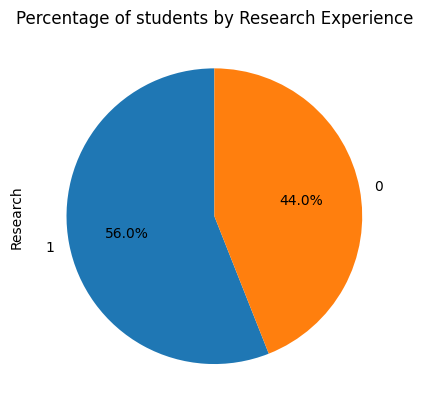

In [18]:
data['Research'].value_counts().plot(kind = 'pie', autopct = "%1.1f%%", startangle = 90)
plt.title("Percentage of students by Research Experience")
plt.show()

- 44% students have research experience and 56% students have no research experience.

In [19]:
data['University Rating'].value_counts().sort_index()

1     34
2    126
3    162
4    105
5     73
Name: University Rating, dtype: int64

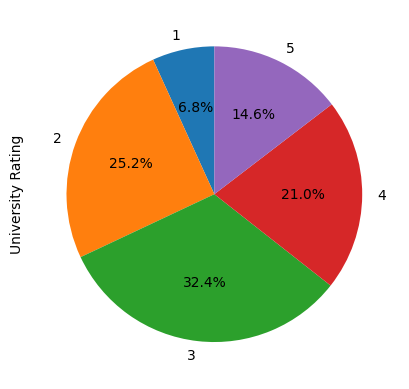

In [20]:
data['University Rating'].value_counts().sort_index().plot(kind = 'pie', autopct = "%1.1f%%", startangle = 90)
plt.show()

- Maximum number of students are having the Chance of Admit for 3-rated University.

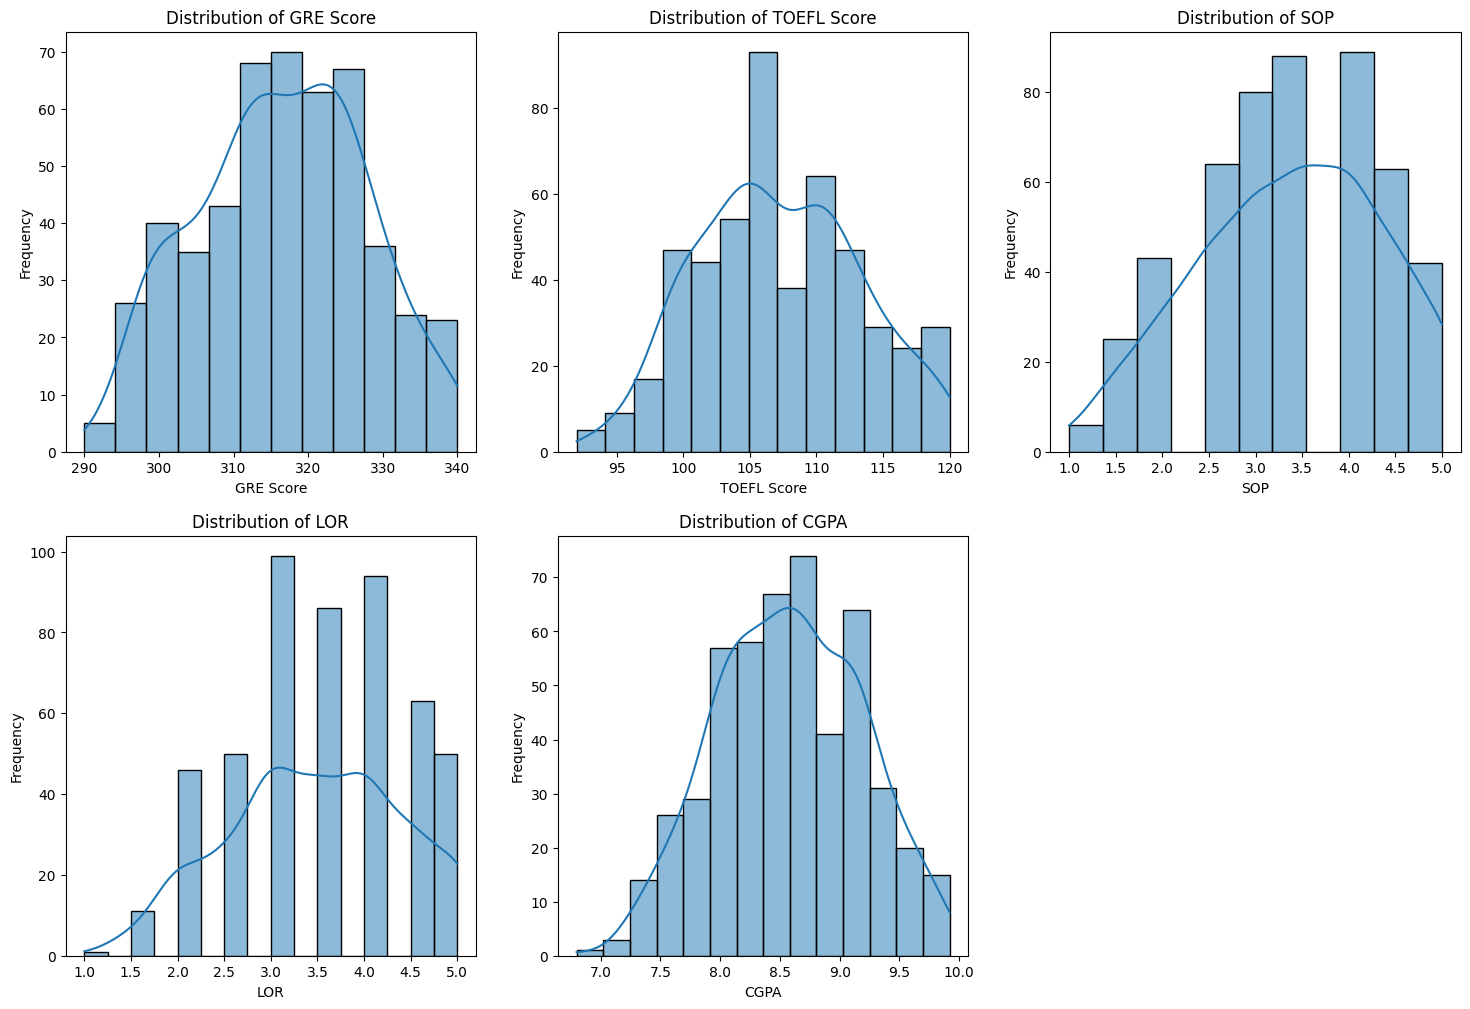

In [21]:
columns = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA']

fig = plt.subplots(figsize = (18, 12))

for idx, col in enumerate(data[columns].columns):
    plt.subplot(2, 3, idx+1)
    sns.histplot(x = col, data = data[columns], kde = True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    

- The distributions are not skewed.

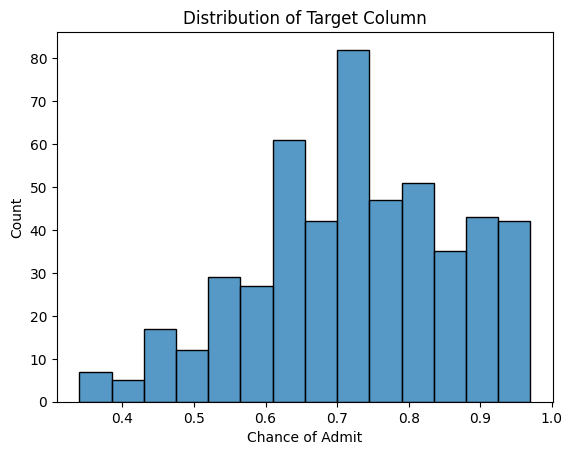

In [22]:
# Distribution of Target column (Chance of Admit)

sns.histplot(x = 'Chance of Admit', data = data)
plt.title("Distribution of Target Column")
plt.show()

## 2.2 Bivariate Analysis:

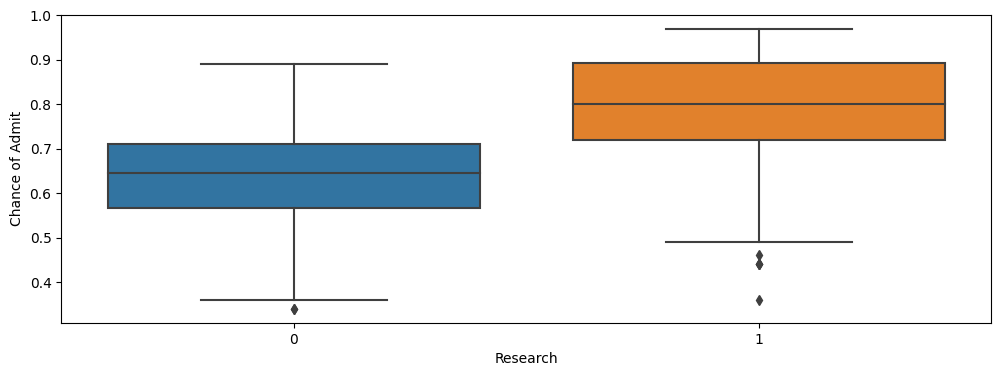

In [23]:
plt.figure(figsize = (12, 4))
sns.boxplot(x = 'Research', y = 'Chance of Admit', data = data)
plt.show()

- Students who have the research experience have more chances of Admission as compared to other students who don't have the research experience.

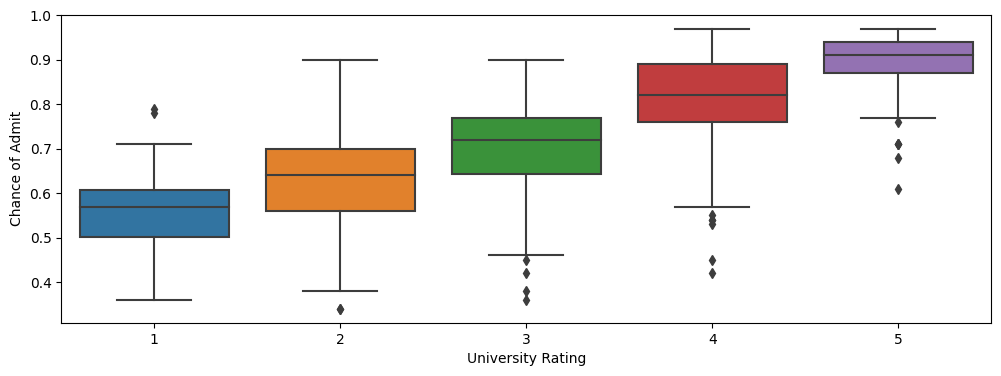

In [24]:
plt.figure(figsize = (12, 4))
sns.boxplot(x = 'University Rating', y = 'Chance of Admit', data = data)
plt.show()

- We can see that, students with higher Chance of Admit are going to the highest rating universities.

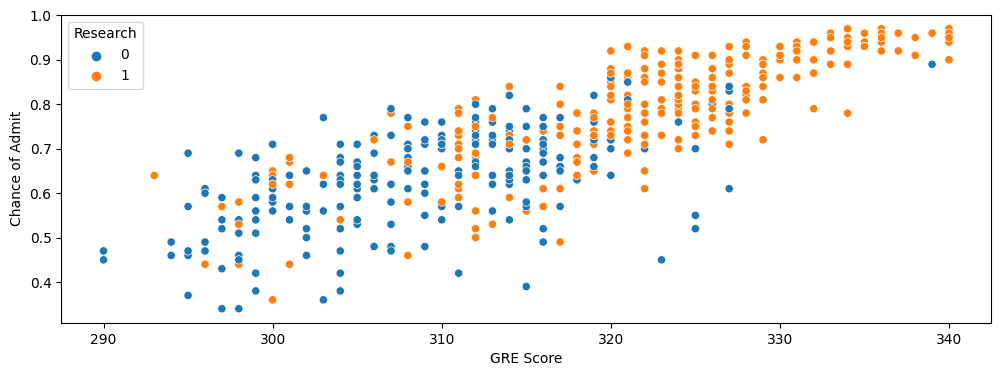

In [25]:
plt.figure(figsize = (12, 4))
sns.scatterplot(x = 'GRE Score', y = 'Chance of Admit', hue = 'Research', data = data)
plt.show()

- As the GRE Score increses, Chance of Admit also increases.
- Mostly, the student with high GRE Score are having Research Experience.

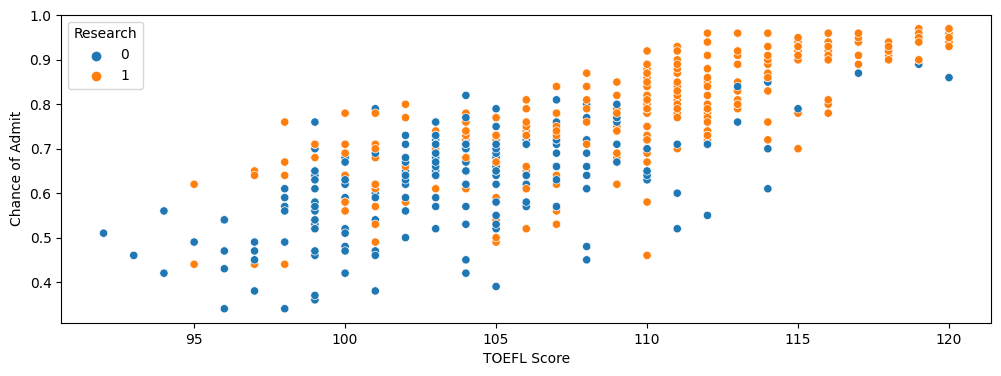

In [26]:
plt.figure(figsize = (12, 4))
sns.scatterplot(x = 'TOEFL Score', y = 'Chance of Admit', hue = 'Research', data = data)
plt.show()

- As the TOEFL Score increses, Chance of Admit also increases.
- There are a lot of students who are having Research Experience have high TOEFL Score.

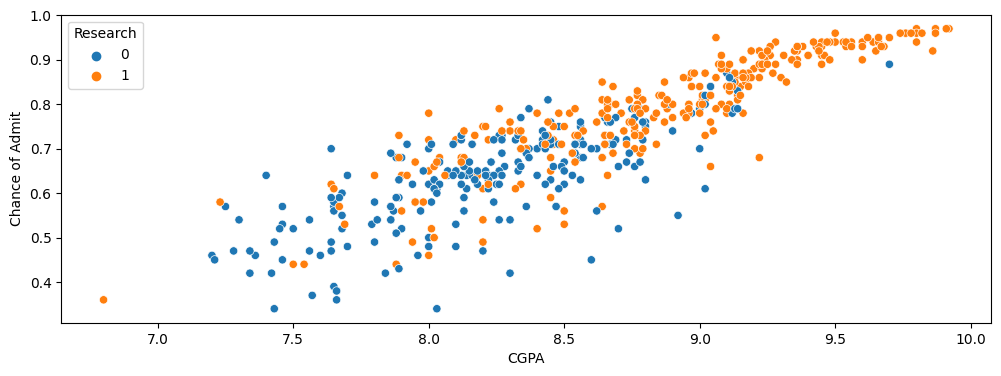

In [27]:
plt.figure(figsize = (12, 4))
sns.scatterplot(x = 'CGPA', y = 'Chance of Admit', hue = 'Research', data = data)
plt.show()

- As the CGPA increses, Chance of Admit also increases.
- Most of the students who are having Research Experience have high CGPA.

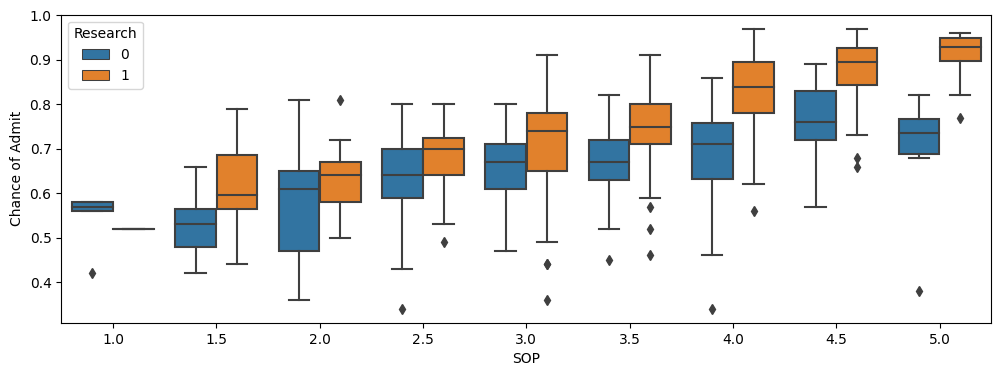

In [28]:
plt.figure(figsize = (12, 4))
sns.boxplot(x = 'SOP', y = 'Chance of Admit', hue = 'Research', data = data)
plt.show()

- Student with Reasearch Experience have higher median of Chance of admit than the students with no Research experience.
- The high rated SOP has higher Chance of Admit.

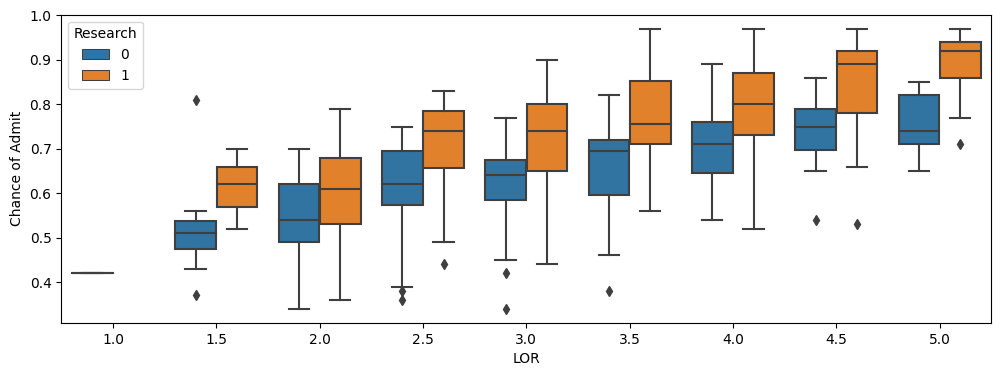

In [29]:
plt.figure(figsize = (12, 4))
sns.boxplot(x = 'LOR', y = 'Chance of Admit', hue = 'Research', data = data)
plt.show()

- Student with Reasearch Experience have higher median of Chance of admit than the students with no Research experience.
- The high rated LOR has higher Chance of Admit.

## 2.3 Multivariate Analysis:

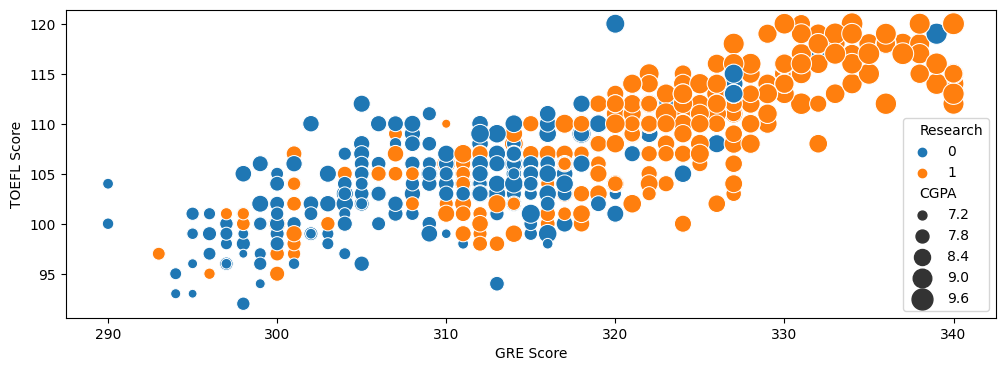

In [30]:
plt.figure(figsize = (12, 4))
sns.scatterplot(x = 'GRE Score', y = 'TOEFL Score', size = 'CGPA', hue = 'Research', data = data, sizes = (10, 250))
plt.show()

- It is clear from the chart, the GRE Score and TOEFL Score are linearly related and more for students with research experience.

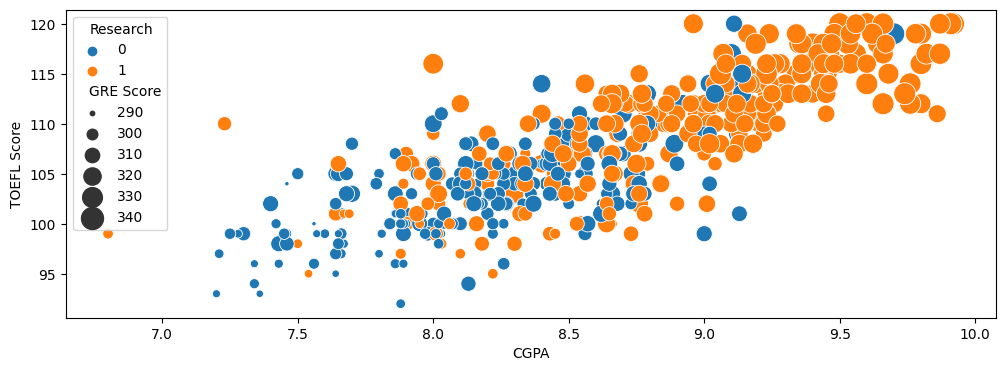

In [31]:
plt.figure(figsize = (12, 4))
sns.scatterplot(x = 'CGPA', y = 'TOEFL Score', size = 'GRE Score', hue = 'Research', data = data, sizes = (10, 250))
plt.show()

- It is clear from the chart, the CGPA and TOEFL Score are linearly related and more for students with research experience.

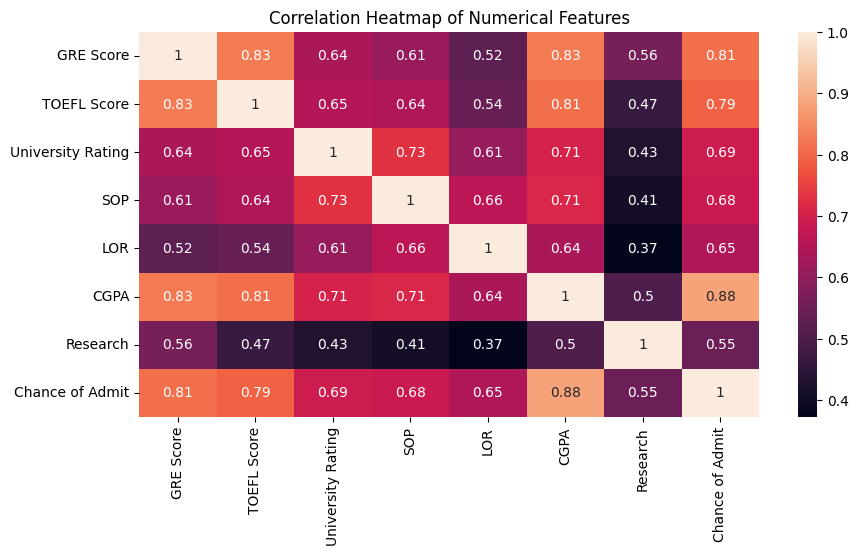

In [32]:
# Heatmap

plt.figure(figsize = (10,5))
sns.heatmap(
    data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA','Research', 'Chance of Admit']].corr(), 
    annot = True
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

- CGPA and Chance of Admit, GRE Score and Chance of Admit, TOEFL Score and Chance of Admit are highly correlated.
- LOR and Chance of Admit, SOP and Chance of Admit, Research Experience and Chance of Admit, University Rating and Chance of Admit are modrately correlated.

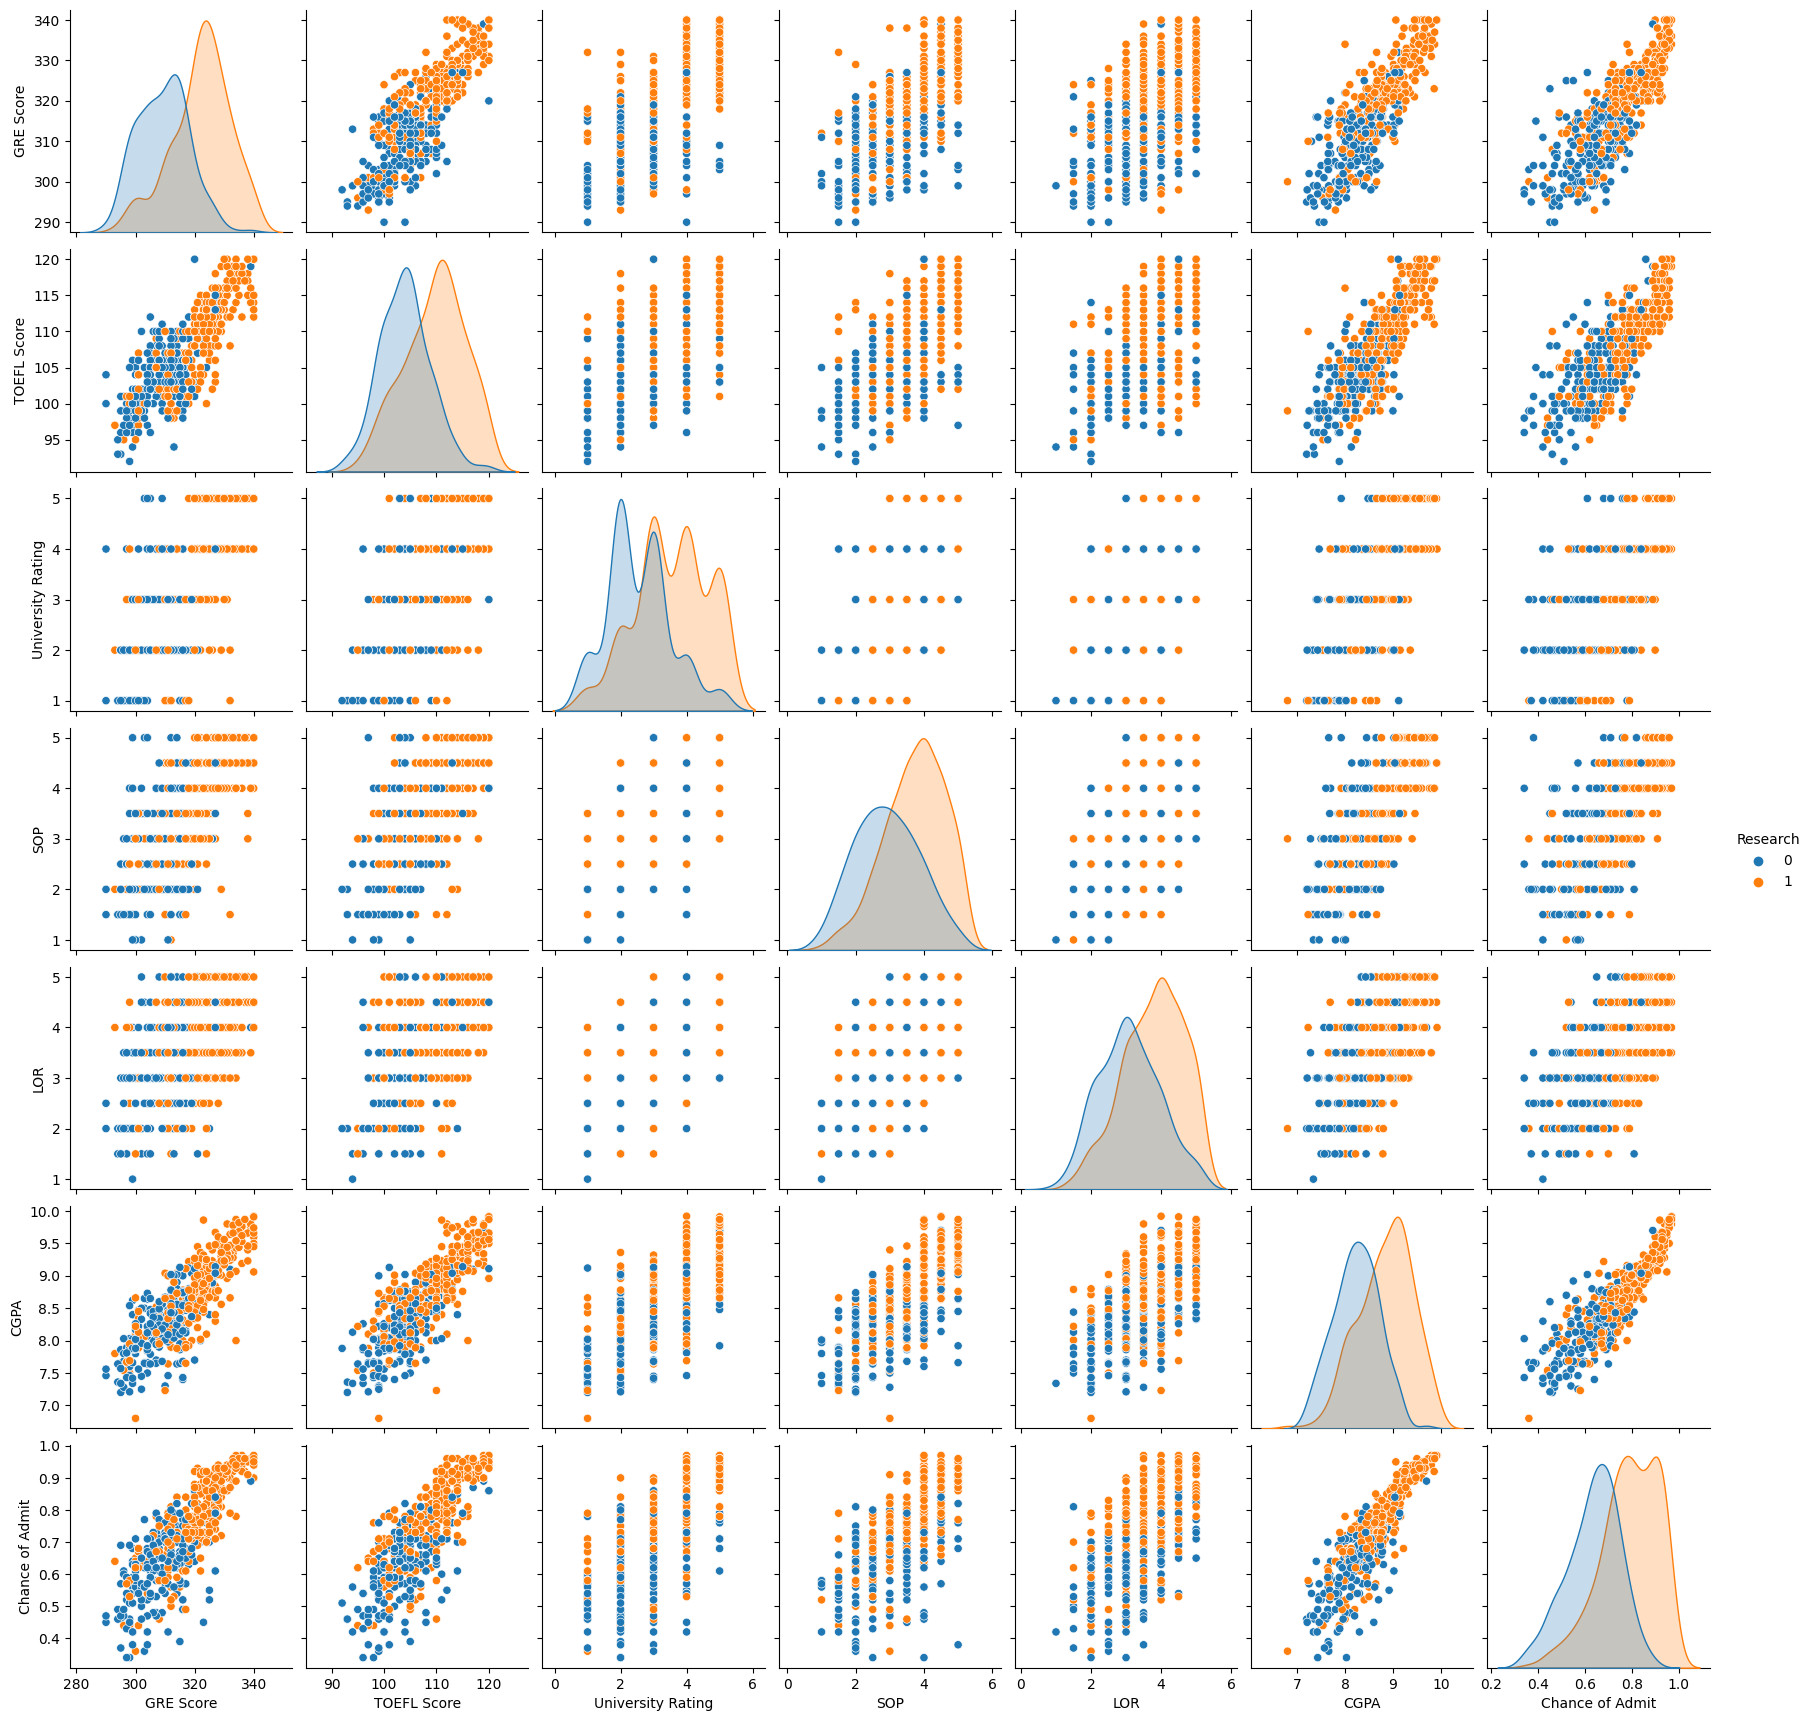

In [33]:
# pairplot

sns.pairplot(data, hue = 'Research')
plt.show()

- CGPA, GRE Score, TOEFL Score, SOP, LOR are linearly related with Chance of Admit.
- CGPA & GRE Score, CGPA & TOEFL Score are linearly related.
- With Research Experience increses the Chance of Admit.

# 3. Hypothesis Testing:

## 3.1 Effect of Research Experience on Chance of Admit:

In [34]:
data.groupby('Research')['Chance of Admit'].mean()

Research
0    0.634909
1    0.789964
Name: Chance of Admit, dtype: float64

We can observe that:

- With Research Experience, the average Chance of Admit is higher than those who have no Research Experience.

**So, to check whether the average Chance of Admit is significant or not, we can do ttest_ind by taking significant level 5%.**

In [35]:
from scipy.stats import ttest_ind

a = data[data['Research'] == 0]['Chance of Admit']
b = data[data['Research'] == 1]['Chance of Admit']

# Null Hypothesis(H0): The average Chance of Admit is independent of Research.
# Alternate Hypothesis(H1): The average Chance of Admit is dependent of Research.

t_stat, p_value = ttest_ind(a, b)
print("t_statistics:", t_stat)
print("p_value:", p_value)

t_statistics: -14.538797385517404
p_value: 3.5954935458409782e-40


In [36]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0.")
    print("The average Chance of Admit is dependent of Research.")
else:
    print("Failed to reject H0.")
    print("The average Chance of Admit is independent of Research.")

Reject H0.
The average Chance of Admit is dependent of Research.


- Since p_value is less than 0.05, we can say that, Research Experience has effect on average Chance of Admit.

**Since pvalue is less than 0.05 so we can reject the Null hypothesis. We can say that Research Experience has effect on the Chance of Admit.**

## 3.2 Relationship between CGPA & GRE Score:

In [40]:
from scipy.stats import pearsonr, t

# Null hypothesis(H0): There is no significant relationship between CGPA and GRE score.
# Altenate hypothesis(H1): There is a significant relationship between CGPA and GRE score.


# Calculate Pearson correlation coefficient
r, p_value = pearsonr(data['CGPA'], data['GRE Score'])


# Calculate the t statistic
n = len(data['CGPA'])
t_stat = r * np.sqrt((n - 2) / (1 - r**2))


# Degrees of freedom
dof = n - 2

# Critical t-value for two-tailed test at alpha = 0.05
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, dof)

print(f"Pearson correlation coefficient: {r}")
print(f"P-value: {p_value}")
print(f"t-statistic: {t_stat}")
print(f"critical t-value: {t_critical}")

Pearson correlation coefficient: 0.8258779536403558
P-value: 5.186076273913848e-126
t-statistic: 32.68645265683415
critical t-value: 1.9647389829672648


In [44]:
# Decision
if abs(t_stat) > t_critical:
    print("Reject the null hypothesis.\nThere is a significant relationship between CGPA and GRE score.")
else:
    print("Fail to reject the null hypothesis.\nThere is no significant relationship between CGPA and GRE score.")

Reject the null hypothesis.
There is a significant relationship between CGPA and GRE score.


- **There is a significant relationship between CGPA and GRE Score.**

## 3.3 Relationship between CGPA & TOEFL Score:

In [45]:
from scipy.stats import pearsonr, t

# Null hypothesis(H0): There is no significant relationship between CGPA and TOEFL score.
# Altenate hypothesis(H1): There is a significant relationship between CGPA and TOEFL score.


# Calculate Pearson correlation coefficient
r, p_value = pearsonr(data['CGPA'], data['TOEFL Score'])


# Calculate the t statistic
n = len(data['CGPA'])
t_stat = r * np.sqrt((n - 2) / (1 - r**2))


# Degrees of freedom
dof = n - 2

# Critical t-value for two-tailed test at alpha = 0.05
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, dof)

print(f"Pearson correlation coefficient: {r}")
print(f"P-value: {p_value}")
print(f"t-statistic: {t_stat}")
print(f"critical t-value: {t_critical}")

Pearson correlation coefficient: 0.8105735363036225
P-value: 8.37164713935297e-118
t-statistic: 30.8872100887137
critical t-value: 1.9647389829672648


In [46]:
# Decision
if abs(t_stat) > t_critical:
    print("Reject the null hypothesis.\nThere is a significant relationship between CGPA and TOEFL score.")
else:
    print("Fail to reject the null hypothesis.\nThere is no significant relationship between CGPA and TOEFL score.")

Reject the null hypothesis.
There is a significant relationship between CGPA and TOEFL score.


- **There is a significant relationship between CGPA and TOEFL Score.**

# 4. Outlier Treatment

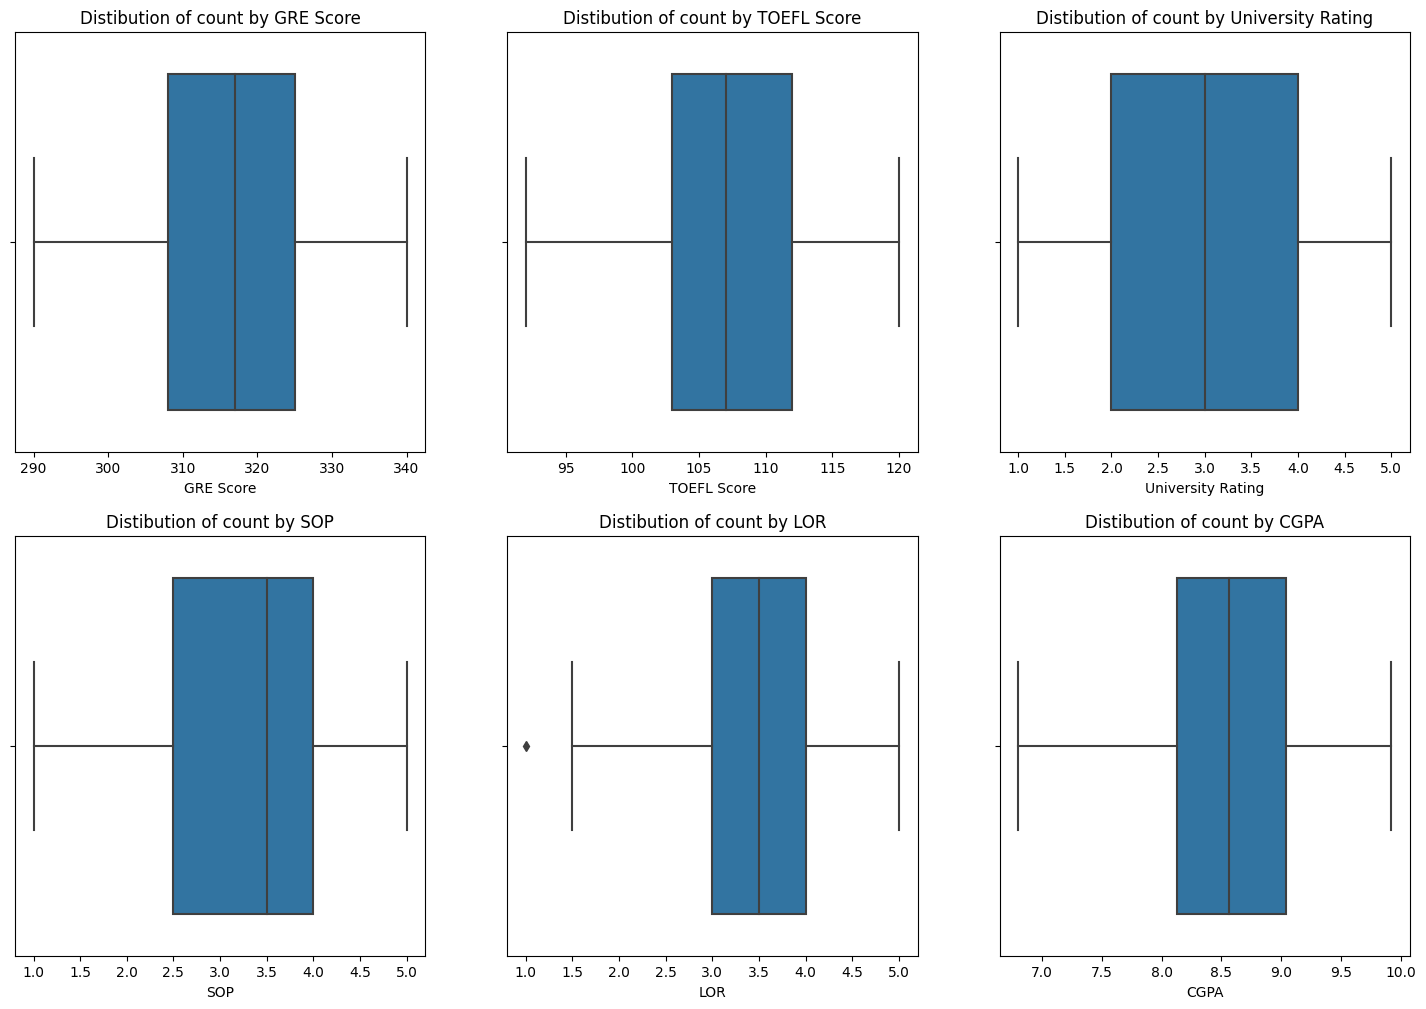

In [47]:
# plotting categorical variables againt 'count' using boxplots

columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']

fig = plt.subplots(figsize=(18, 12))

for idx, col in enumerate(data[columns].columns):
    plt.subplot(2, 3, idx+1)
    sns.boxplot(x = col, data = data[columns])
    plt.title(f"Distibution of count by {col}")
    
plt.show()

- There is only one outlier.

In [48]:
data.skew()

GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

In [49]:
# getting the first quartile
Q1 = data.quantile(0.25)

# getting the third quartile
Q3 = data.quantile(0.75)

# calculating the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [50]:
# Define the condition for outliers
outlier_condition = ~((data < (Q1 - 1.5*IQR))|(data > (Q3 + 1.5*IQR))).any(axis = 1)

# Filter the DataFrame based on the outlier condition
data = data[outlier_condition]

In [51]:
data.shape

(497, 8)

In [52]:
# copying the data into another dataframe df
df = data.copy()

# 5. Standardization/Normalization of Numerical Features

In [53]:
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']

In [56]:
# import minmaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the StandardScaler
scale = MinMaxScaler()

# fit the StandardScaler
for col in cols:
    data[col] = scale.fit_transform(data[[col]])
data[cols]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.857143,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.857143,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.571429,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.285714,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.428571,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.714286,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000000,0.522436,0.0


# 6. Model Building

### 6.1 Linear Regression Model(Base Model):

In [57]:
# Defining X and y

X = data.drop('Chance of Admit', axis = 1)
y = data['Chance of Admit']

In [58]:
# splitting x and y into X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [59]:
# importing and creating the linear regression model 

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# getting the coefficients of the linear model
model.coef_

array([0.0826894 , 0.08383598, 0.02225535, 0.0145507 , 0.05830124,
       0.37518707, 0.0220937 ])

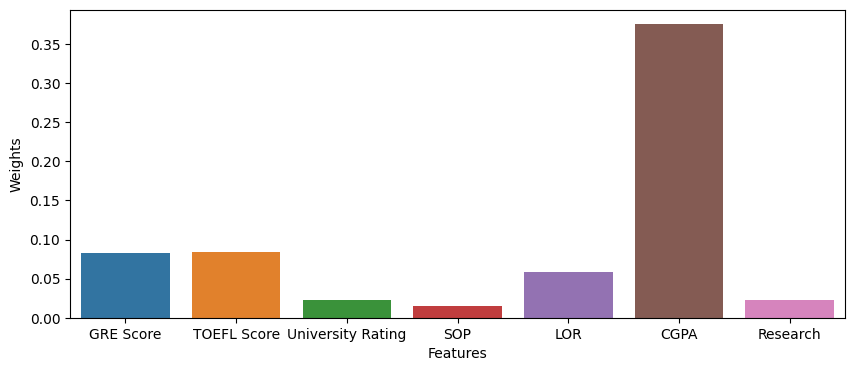

In [61]:
imp = pd.DataFrame(list(zip(X_test.columns, np.abs(model.coef_))), columns = ['Features', 'Weights'])

plt.figure(figsize = (10, 4))
sns.barplot(x = 'Features', y = 'Weights', data = imp)
plt.show()

In [62]:
X_test.columns[np.argmin(model.coef_)]

'SOP'

In [63]:
X_test.columns[np.argmax(model.coef_)]

'CGPA'

- So, CGPA is important feature followed by GRE SCore, TOEFL Score, Research and LOR.
- SOP is less important feature.

In [64]:
# getting the intercept(bias) of liner model

model.intercept_

0.3532267899572607

In [65]:
# getting the predicted values

y_pred = model.predict(X_test)
y_pred

array([0.77281088, 0.94989185, 0.9504927 , 0.56186589, 0.84886429,
       0.67388536, 0.90822317, 0.50807386, 0.62887482, 0.64543226,
       0.46011119, 0.78502772, 0.72162425, 0.7827017 , 0.95081958,
       0.73616727, 0.94046678, 0.73430294, 0.71350906, 0.8219    ,
       0.7205298 , 0.66552274, 1.00079013, 0.58681961, 0.5188752 ,
       0.77798272, 0.95523506, 0.78617364, 0.56512204, 0.64357598,
       0.79063738, 0.6362231 , 0.91184707, 0.788925  , 0.75710853,
       0.7174558 , 0.62959672, 0.86256252, 0.77190091, 0.84997218,
       0.60630573, 0.59923902, 0.7324683 , 0.62969724, 0.81364739,
       0.65634769, 0.61524004, 0.73191973, 0.55746186, 0.58969252,
       0.62007923, 0.8757515 , 0.73879395, 0.50637202, 0.64954769,
       0.65746299, 0.72672336, 0.656528  , 0.88813908, 0.64104656,
       0.69365502, 0.84544287, 0.92034335, 0.78374238, 0.59978217,
       0.94241509, 0.48798379, 0.94302893, 0.9106231 , 0.84640886,
       0.6702452 , 0.79762095, 0.4830991 , 0.68828405, 0.83210

In [66]:
# r2 score of train data

model.score(X_train, y_train)

0.8234060990536944

In [67]:
# r2 score of test data

model.score(X_test, y_test)

0.8153548390017229

- R2_score for train and test data are almost same.

### 6.2 Lasso and Ridge Regression Model:

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [69]:
def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

def get_metrics(y_true, y_pred, p=None):
    n = y_true.shape[0]
    mse = np.sum((y_true - y_pred)**2) / n
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    score = r2_score(y_true, y_pred)
    adj_r2 = None
    if p is not None:
        adj_r2 = adjusted_r2(score, p, n)
        
    res = {
        "mean_absolute_error": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(score, 2),
        "adj_r2": round(adj_r2, 2)
    }
    return res

In [70]:
def train_model(X_train, y_train, X_test, y_test, cols, model_name="linear", alpha=1.0):
    model = None
    if model_name == "lasso":
        model = Lasso(alpha=alpha)
    elif model_name == "ridge":
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    p = X_train.shape[1]
    train_res = get_metrics(y_train, y_pred_train, p)
    test_res = get_metrics(y_test, y_pred_test, p)

    print(f"\n----   {model_name.title()} Regression Model  ----\n")
    print(f"Train MAE: {train_res['mean_absolute_error']} Test MAE: {test_res['mean_absolute_error']}")
    print(f"Train RMSE: {train_res['rmse']} Test RMSE: {test_res['rmse']}")
    print(f"Train R2_score: {train_res['r2_score']} Test R2_score: {test_res['r2_score']}")
    print(f"Train Adjusted_R2: {train_res['adj_r2']} Test Adjusted_R2: {test_res['adj_r2']}")
    print(f"Intercept: {model.intercept_}")
    
    #print(len(df.columns), len(model.coef_))
    coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})
    print(coef_df)
    print("-"*50)
    return model

In [71]:
train_model(X_train, y_train, X_test, y_test,data.columns[:-1], "linear")
train_model(X_train, y_train, X_test, y_test,data.columns[:-1], "ridge")
train_model(X_train, y_train, X_test, y_test,data.columns[:-1], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.8
Intercept: 0.3532267899572607
              Column      Coef
0          GRE Score  0.082689
1        TOEFL Score  0.083836
2  University Rating  0.022255
3                SOP  0.014551
4                LOR  0.058301
5               CGPA  0.375187
6           Research  0.022094
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.8
Intercept: 0.36522777810609075
              Column      Coef
0          GRE Score  0.100724
1        TOEFL Score  0.096493
2  University Rating  0.029023
3                SOP  0.024774
4                LOR  0.065466
5               CGPA  0.298644
6           Research  0.024916
-------------

Lasso(alpha=0.001)

- Since model is not overfitting, Results for Linear, Ridge and Lasso are the same.
- R2_score and Adjusted_r2 are almost the same. Hence there are no unnecessary independent variables in the data.

# 7. Linear Regression Model - Assumption Test

### 7.1 Mutlicollinearity Check: 

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
def vif(df):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

In [74]:
res = vif(df.iloc[:,:-1])
res

,feature,VIF
0,GRE Score,1311.336379
1,TOEFL Score,1215.711563
2,University Rating,20.996452
3,SOP,35.560845
4,LOR,31.037767
5,CGPA,947.759449
6,Research,2.878970


In [75]:
# drop GRE Score and again calculate the VIF
res = vif(df.iloc[:, 1:-1])
res

,feature,VIF
0,TOEFL Score,637.520007
1,University Rating,19.964458
2,SOP,33.997834
3,LOR,30.798702
4,CGPA,726.745937
5,Research,2.873754


In [76]:
# drop TOEFL Score and again calculate the VIF
res = vif(df.iloc[:,2:-1])
res

,feature,VIF
0,University Rating,19.851338
1,SOP,33.898746
2,LOR,30.521483
3,CGPA,25.475655
4,Research,2.852210


In [77]:
# Now lets drop the SOP and again calculate VIF
res = vif(df.iloc[:,2:-1].drop(columns=['SOP']))
res

,feature,VIF
0,University Rating,15.135958
1,LOR,27.121212
2,CGPA,22.712043
3,Research,2.826816


In [78]:
# lets drop the LOR as well
new_df = df.iloc[:,2:-1].drop(columns=['SOP'])
new_df = new_df.drop(columns=['LOR'], axis=1)
res = vif(new_df)
res

,feature,VIF
0,University Rating,12.543435
1,CGPA,11.124591
2,Research,2.792526


In [79]:
# drop the University Rating
new_df = new_df.drop(columns=['University Rating'])
res = vif(new_df)
res

,feature,VIF
0,CGPA,2.471977
1,Research,2.471977


In [80]:
# now again train the model with these only two features

X = data[['CGPA', 'Research']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [81]:
model = train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "linear")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "ridge")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.78 Test R2_score: 0.82
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.82
Intercept: 0.37150915803181495
     Column      Coef
0      CGPA  0.579458
1  Research  0.038844
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.77 Test R2_score: 0.81
Train Adjusted_R2: 0.77 Test Adjusted_R2: 0.81
Intercept: 0.40028438651949655
     Column      Coef
0      CGPA  0.517554
1  Research  0.050663
--------------------------------------------------

----   Lasso Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.78 Test R2_score: 0.82
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.3892841469808259
     Column      Coef
0      CGPA  0.545622
1  Research  0.041586
-------------------------------------

Lasso(alpha=0.001)

- After removing collinear features using VIF and using only two features. R2_score and Adjusted_r2 are still the same as before the testing dataset.

### 7.2 Mean of Residuals:

- It is clear from RMSE that Mean of Residuals is almost zero.

### 7.3 Linearity of variables:

- It is quite clear from EDA that independent variables are linearly dependent on the target variables.

### 7.4 Normality of Residuals:

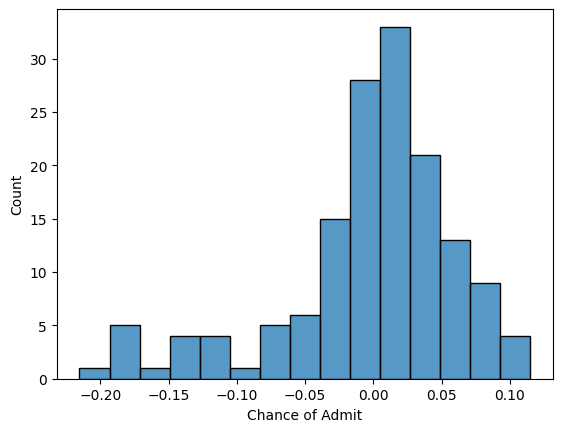

In [82]:
y_pred = model.predict(X_test)
errors= (y_test - y_pred)
sns.histplot(errors)
plt.show()

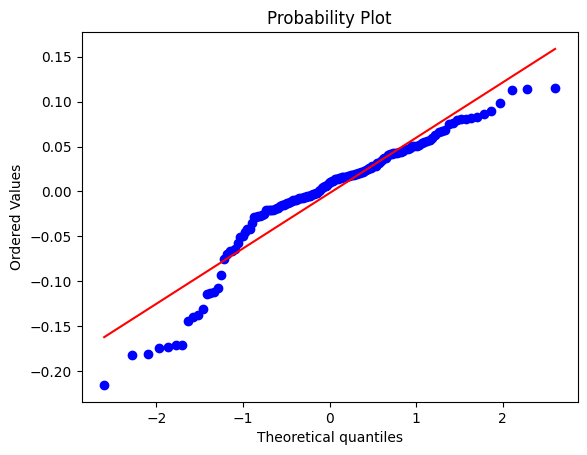

In [83]:
stats.probplot(errors, plot=plt)
plt.show()

In [89]:
from scipy import stats

# H0: Distribution is normal
# H1: Distribution is not normal

res = stats.shapiro(errors)
print("shapiro_stat", res.statistic)
print("p_value:", res.pvalue)

shapiro_stat 0.9092848300933838
p_value: 4.581528756375519e-08


In [88]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0.\nThe distribution is not normal.")
else:
   print("Failed to reject H0.\nThe distribution is normal.") 

Reject H0.
The distribution is not normal.


- The residuals does not follow a normal distribution.

### 7.5 Test for Homoscedacity:

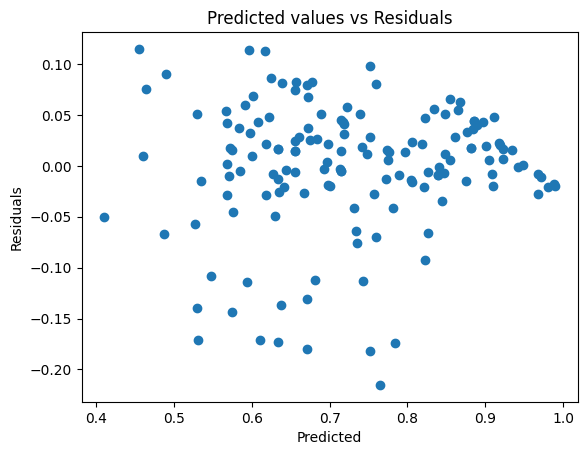

In [85]:
plt.scatter(y_pred, errors)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.show()

- Since the plot is not creating a cone type shape. Hence there is no homoscedasticity present in the data.

### 7.6 Auto-Correlation: 

- There is no auto Correlation in fearures.

# 8. Insights:

- Multicollinearity is present in the data.
- After removing collinear features there are only two variables (CGPA and Research Experience) which are important in making predictions for the target variables.
- Indepedent variables are linearly correlated with dependent variables.

# 9. Recommendations:

- CGPA and Research are the only two variables which are important in making the prediction for Chance of Admit.
- CGPA is the most important varibale in making the prediction for the Chance of Admit.
- Following are the final model results on the test data:

   **MAE:** 0.05

   **RMSE:** 0.07
   
   **R2_score:** 0.81
   
   **Adjusted_R2:** 0.81